### This Python notebook should sreve as an example of how to use tint
First import all modules that are needed

In [1]:
%matplotlib inline
import matplotlib
from tint import Cell_tracks, animate
import os, pandas as pd
from itertools import groupby
import numpy as np
from netCDF4 import Dataset as nc, num2date, date2num
from datetime import datetime, timedelta
from tint.helpers import get_times, get_grids
from tint.visualization import embed_mp4_as_gif, plot_traj

### Define some important variables

In [2]:
dataF = os.path.join(os.path.abspath('.'),'data','CPOL_radar.nc') #NetCDF data file
trackdir = os.path.join(os.path.abspath('.'),'tracks') #Output directory
overwrite = True #Overwirte existing old files
first = '2006-11-16 03:00' #Start-date
last = '2006-11-16 11:00' #End-date

The application of the tracking algorithm constists of the following steps:
    1. read data and meta-data (from netCDF data)
    2. apply the tracking and save the ouput to a pandas-dataframe
    3. animate the tracking output

### Open the netCDF file and apply the tracking

In [3]:
with nc(dataF) as ncf:
        slices = get_times(ncf.variables['time'], first, last,
                           ncf.variables['isfile'][:]) #Get the data
        lats = ncf.variables['latitude'][:,0]
        lons = ncf.variables['longitude'][0,:]
        x = lons[int(117/2)]
        y = lats[int(117/2)]
        grids = []
        for s in slices:
            ani = False
            #Create an iterator for the data dictionary 
            gr = (i for i in get_grids(ncf, s, lons, lats, varname='radar_estimated_rain_rate'))
            anim = (i for i in get_grids(ncf, s, lons, lats, varname='radar_estimated_rain_rate'))
            #Construct start and end date of slcie
            start = num2date(ncf.variables['time'][s[0]],
                             ncf.variables['time'].units)
            end = num2date(ncf.variables['time'][s[-1]],
                           ncf.variables['time'].units)
            #Filename suffix
            suffix = '%s-%s'%(start.strftime('%Y_%m_%d_%H'), end.strftime('%Y_%m_%d_%H'))
            tracks_obj = Cell_tracks()
            tracks_obj.params['MIN_SIZE'] = 4
            tracks_obj.params['FIELD_THRESH'] = 1
            track_file = os.path.join(trackdir,'tint_tracks_%s.pkl'%suffix)
            if not os.path.isfile(track_file) or overwrite:
                ncells = tracks_obj.get_tracks(gr, (x,y))
                if ncells > 2 :
                    tracks_obj.tracks.to_pickle(track_file)
                    ani = True
                else:
                    ani = False
            animate(tracks_obj, anim, os.path.join(trackdir,'ani', 'tint_tracks_%s.mp4'%suffix), 
                    overwrite=overwrite, dt=9.5, tracers=True)
            
               
                
            

No cells found in scan 49     

time elapsed 0.1 minutes
Animating 49 frames
Frame: 0       

/usr/lib/python3/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


Frame: 49       

### Accessing the tracking data
 the tracks are saved in a dataframe and can be accessed by the ```.tracks``` instance:

In [4]:
tracks_obj.tracks.head(20)

area   grid_x  grid_y isolated      lat       lon        max  \
scan uid                                                                     
0    0    0.232713    6.471  44.529    False -12.5382  129.8419   1.451491   
     1    0.123201    1.778  49.333    False -12.4483  129.7495   1.398994   
     2    0.136890  104.500  50.800    False -12.4033  132.1082   5.279258   
     3    0.082134   91.500  53.000    False -12.3583  131.8307   3.560659   
     4    0.054756   73.250  54.750    False -12.3134  131.3913   2.505264   
     5    1.314144   35.844  82.125    False -11.7064  130.5357  31.694477   
     6    0.287469   28.143  91.381    False -11.5041  130.3507  28.975254   
     7    0.082134   36.333  90.833    False -11.5041  130.5357  10.012076   
1    8    0.150579  104.909  50.636     True -12.4033  132.1313   5.217285   
     9    0.068445  108.800  50.600     True -12.4033  132.2238   1.721878   
     10   0.082134   95.500  52.000     True -12.3808  131.9232   3.727539   
     11   0.095823   76.714  53.000     True -12.3583  131.4838   9.706904   
     12   0.095823   88.000  52.714     True -12.3583  131.7382   4.187761   
     13   0.095823   73.000  55.000     True -12.3134  131.3913  10.321914   
     5    0.547560   72.650  86.600     True -11.5940  131.3913  32.242092   
     14   0.191646   78.071  92.571     True -11.4591  131.5069  13.510443   
     15   0.054756   97.500  95.000     True -11.4142  131.9694   2.591437   
     16   0.109512   91.500  98.125     True -11.3467  131.8307   5.032235   
2    17   0.136890  113.800  47.700    False -12.4708  132.3394   5.353242   
     18   0.054756   99.500  48.500    False -12.4708  132.0157   1.403970   

              mean                time  
scan uid                                
0    0    1.227551 2006-11-16 03:00:00  
     1    1.174826 2006-11-16 03:00:00  
     2    3.048147 2006-11-16 03:00:00  
     3    2.421517 2006-11-16 03:00:00  
     4    2.042082 2006-11-16 03:00:00  
     5    9.116140 2006-11-16 03:00:00  
     6    8.472269 2006-11-16 03:00:00  
     7    5.809241 2006-11-16 03:00:00  
1    8    3.262669 2006-11-16 03:10:00  
     9    1.453328 2006-11-16 03:10:00  
     10   2.343086 2006-11-16 03:10:00  
     11   3.791519 2006-11-16 03:10:00  
     12   2.103100 2006-11-16 03:10:00  
     13   4.560273 2006-11-16 03:10:00  
     5    9.384638 2006-11-16 03:10:00  
     14   6.020382 2006-11-16 03:10:00  
     15   2.371529 2006-11-16 03:10:00  
     16   2.767307 2006-11-16 03:10:00  
2    17   3.407234 2006-11-16 03:20:00  
     18   1.189312 2006-11-16 03:20:00

### Visualize the tracking output

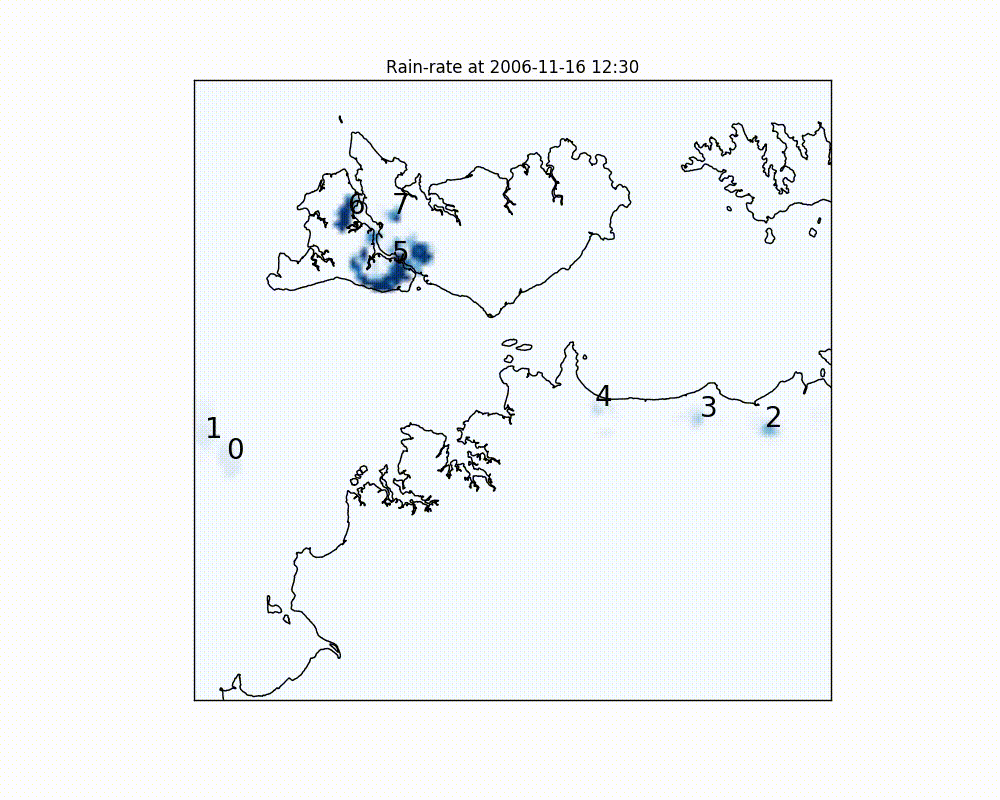

In [5]:
embed_mp4_as_gif(os.path.join(trackdir,'ani', 'tint_tracks_%s.mp4'%suffix))

 Create a trace plot of the individually tracked objects

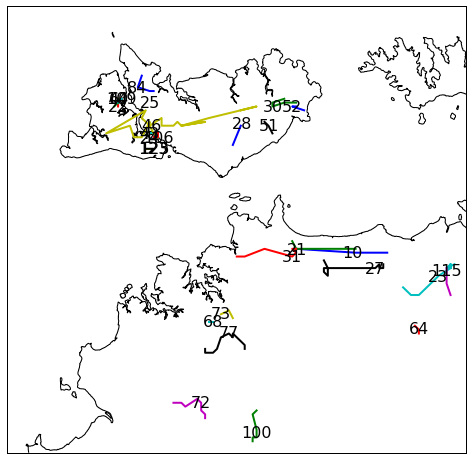

In [6]:
ax = plot_traj(tracks_obj.tracks, lons, lats, basemap_res='f', label=True)